In [1]:
import pandas as pd
from pandas import Series
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#1.A
#파일읽기
train = pd.read_csv('au4_2500_train.csv')

#5개의 feature뽑기

test_feature = ['V3','V8','V45','V51','V88','Class']
new_data = train[test_feature]

#nan값 처리
new_data = new_data.fillna(method ='ffill')


#EDA수행
train.info()
train.shape
new_data.shape
new_data.info()
new_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 101 entries, V1 to Class
dtypes: float64(53), int64(5), object(43)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
V3       2000 non-null object
V8       2000 non-null float64
V45      2000 non-null float64
V51      2000 non-null object
V88      2000 non-null float64
Class    2000 non-null object
dtypes: float64(3), object(3)
memory usage: 93.8+ KB


,V8,V45,V88
count,2000.000000,2000.00000,2000.000000
mean,1.519000,7.85082,538.562000
std,0.989004,0.42668,157.607453
min,0.000000,7.27000,359.000000
25%,1.000000,7.50750,439.000000
50%,1.000000,7.77000,472.000000
75%,2.000000,8.14250,656.000000
max,3.000000,8.85000,911.000000


In [3]:
new_data.head()

,V3,V8,V45,V51,V88,Class
0,v5,1.0,7.31,v4,460.0,class2
1,v2,2.0,7.43,v3,862.0,class2
2,v5,2.0,7.95,v5,401.0,class1
3,v6,3.0,7.28,v3,663.0,class3
4,v6,2.0,7.81,v3,435.0,class2


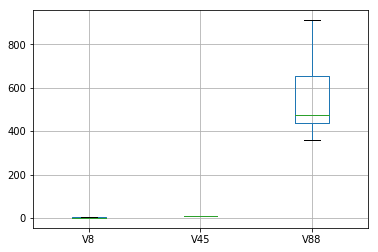

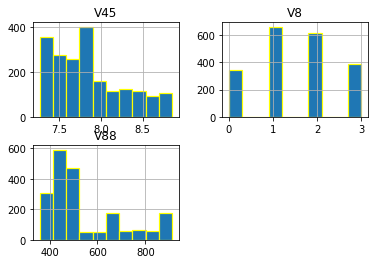

In [242]:
#시각화 하기

new_data.boxplot()
plt.show()
new_data.hist(edgecolor='yellow', linewidth=1.2)
plt.show()


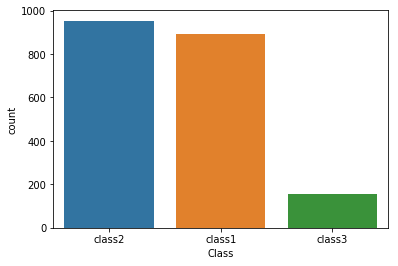

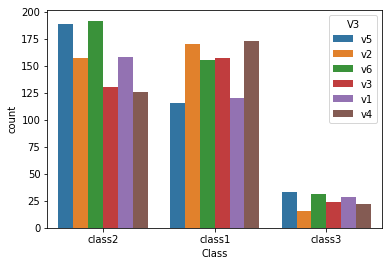

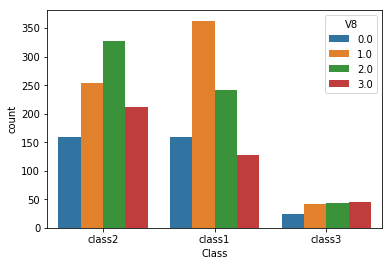

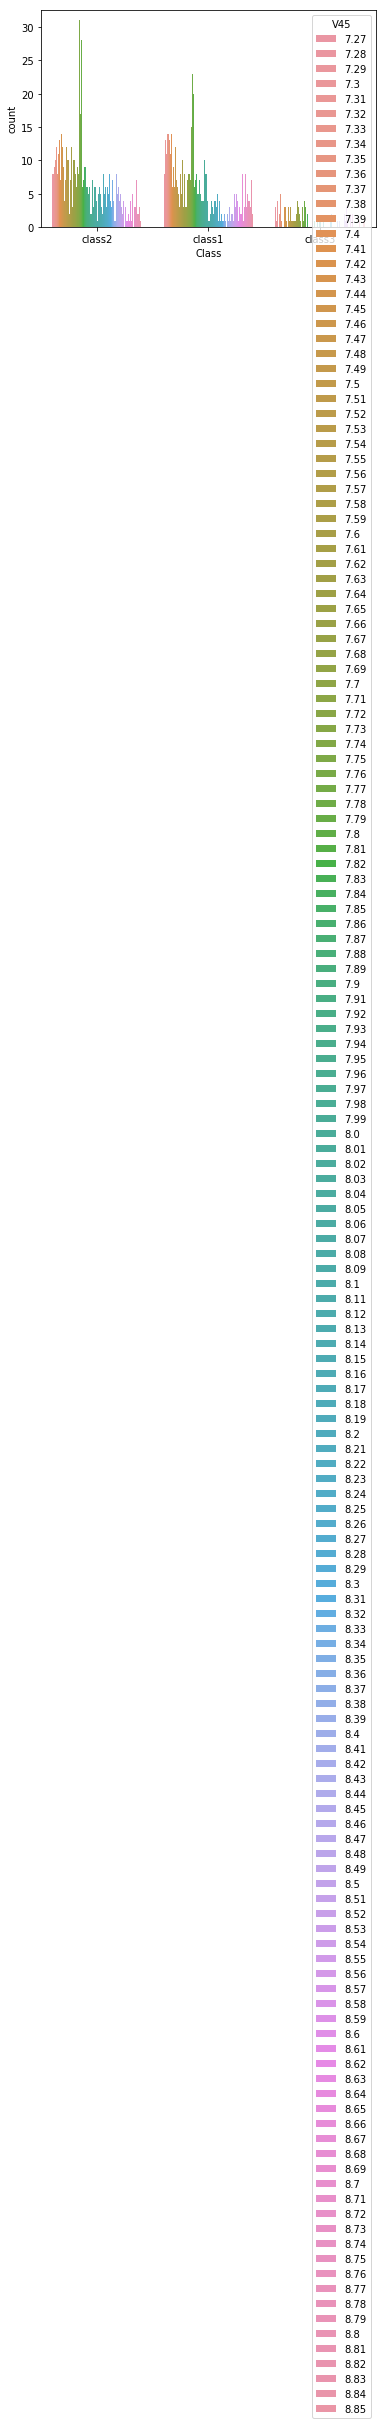

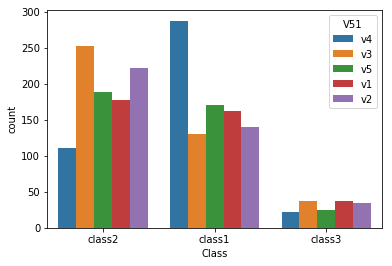

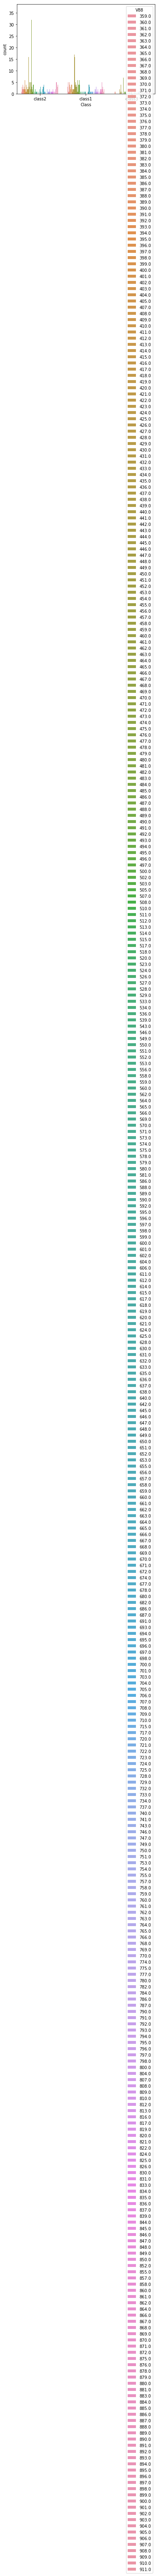

In [243]:
#Class에 따른 값들 시각화
sns.countplot(x="Class", data=new_data)
plt.show()
#각 feature별 class의 개수 시각화
sns.countplot(x="Class", hue="V3", data=new_data)
plt.show()
sns.countplot(x="Class", hue="V8", data=new_data)
plt.show()
sns.countplot(x="Class", hue="V45", data=new_data)
plt.show()
sns.countplot(x="Class", hue="V51", data=new_data)
plt.show()
sns.countplot(x="Class", hue="V88", data=new_data)
plt.show()

In [244]:
#1.B 5-NN분류기 사용
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

X_train = new_data[['V3','V8','V45','V51','V88']]


pd.options.mode.chained_assignment = None
le = LabelEncoder()
X_train.loc[:,'V3'] = le.fit_transform(X_train['V3'])
X_train.loc[:,'V51'] = le.fit_transform(X_train['V51'])

X_train_normalized = (X_train - X_train.mean()) / X_train.std()

#le = LabelEncoder()
Y_train = new_data['Class']

X_train.head()
X_train_normalized.head()


,V3,V8,V45,V51,V88
0,0.817295,-0.524771,-1.267507,0.704851,-0.498466
1,-0.919783,0.486348,-0.986266,-0.014018,2.052175
2,0.817295,0.486348,0.232446,1.423720,-0.872814
3,1.396322,1.497467,-1.337817,-0.014018,0.789544
4,1.396322,0.486348,-0.095669,-0.014018,-0.657088


In [245]:
knn.fit(X_train_normalized, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [246]:
test = pd.read_csv('au4_2500_test.csv')
test_data = test[test_feature]

test_data = test_data.fillna(method ='ffill')

X_test = test_data[['V3','V8','V45','V51','V88']]
X_test.info()
#object값 변경
X_test.loc[:,'V3'] = le.fit_transform(X_test['V3'])
X_test.loc[:,'V51'] = le.fit_transform(X_test['V51'])
#정규화하기
X_test_normalized = (X_test - X_test.mean()) / X_test.std()


Y_test = test_data['Class']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
V3     500 non-null object
V8     500 non-null int64
V45    500 non-null float64
V51    500 non-null object
V88    500 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.6+ KB


In [247]:

Y= knn.predict(X_test)
test = knn.score(X_test_normalized,Y_test)##test accuracy
train = knn.score(X_train_normalized, Y_train)#training accuracy
display(test)
display(train)


0.652

0.7185

In [248]:
# Decision tree 분류기
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)
test = tree_model.score(X_test, Y_test)
train = tree_model.score(X_train, Y_train)
print(test)
print(train)


0.604
0.9995


In [249]:
#SVM 
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, Y_train)
svm_model.predict(X_test)
test = svm_model.score(X_test, Y_test)
train = svm_model.score(X_train, Y_train)
print(test)
print(train)

0.498
0.79


In [250]:
#데이터분석2
#최적의 k값 찾기
from sklearn.model_selection import cross_val_score
k_list = list(range(1,30))
k_list = list(filter(lambda x: x%2 == 1, k_list))
knn_error = []

knn_score = []


In [251]:
#cross validation for optimal parameter
from sklearn.model_selection import train_test_split
from sklearn import datasets
for k in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv,  X_train_normalized, Y_train, cv=10, scoring='accuracy')
    print(scores.mean())
    knn_score.append(scores.mean())
    knn_error.append(1-scores.mean())
max(knn_score)

0.5640697428326796
0.5835002881260151
0.6109910845543416
0.6110535493585358
0.6080433744754509
0.6045433494748259
0.6110583509637245
0.6065704909949481
0.6040082243392718
0.6000255880159381
0.5940454146254648
0.5940329760719265
0.5890178260644635
0.5830524791585135
0.5720022779034821


0.6110583509637245

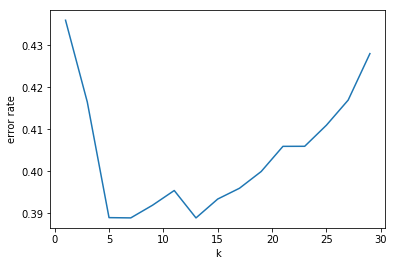

In [252]:
plt.plot(k_list, knn_error)
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()

In [253]:
k_optimal = k_list[knn_error.index(min(knn_error))]
k_optimal

13

In [254]:
#svm
from sklearn import svm
import numpy as np

#C가 크면 허용범위가 작아짐 즉 엄격해짐 
#gamma 바꿔보기
for i in range(1,5):
    clf = svm.SVC(gamma=i, C=1)
    clf.fit(X_train, Y_train)
    clf.predict(X_test)
    clf.score(X_test,Y_test)
    print( clf.score(X_test,Y_test))

0.496
0.504
0.472
0.472


In [255]:
#c 최적값을 위해 test
c_list = list(range(1,30))
c_list = list(filter(lambda x: x%2 == 1, c_list))

svm_error = []
svm_score = []

In [256]:
for c in c_list:
    svm_cv = svm.SVC(kernel='linear', C=c)
    scores = cross_val_score(svm_cv, X_train_normalized, Y_train, cv=10, scoring='accuracy')
    print(scores.mean())
    svm_score.append(scores.mean())
    svm_error.append(1-scores.mean())

0.5261378056728645
0.5261378056728645
0.5261378056728645
0.5256427561679141
0.5261378056728645
0.5261378056728645
0.5256427561679141
0.5256427561679141
0.5256427561679141
0.5256427561679141
0.5256427561679141
0.5256427561679141
0.5256427561679141
0.5256427561679141
0.5261452687307282


In [257]:
max(svm_score)
c_optimal = c_list[svm_error.index(min(svm_error))]
c_optimal

29

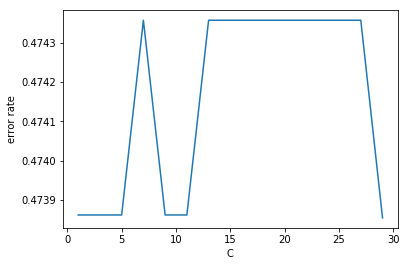

In [258]:
plt.plot(c_list, svm_error)
plt.xlabel('C')
plt.ylabel('error rate')
plt.show()

In [259]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = knn.predict(X_test_normalized)
confusion = confusion_matrix(Y_test, Y_pred)
print(confusion)
print(classification_report(Y_test, Y_pred))

[[182  57   0]
 [ 75 144   1]
 [ 19  22   0]]
             precision    recall  f1-score   support

     class1       0.66      0.76      0.71       239
     class2       0.65      0.65      0.65       220
     class3       0.00      0.00      0.00        41

avg / total       0.60      0.65      0.62       500

